## Derivation of the grand-canonical ensemble

and chemical potential: analysis of the thermodynamic limit

In [1]:
import numpy as np
from scipy.special import comb # number of combinations
import matplotlib.pyplot as plt

### Theory

The whole system A+B can just exchange energies with the outside world, while the n. of particles is fixed to $N = N_A + N_B$. Hence, the probability to have k particles in system A is (ratio between the n. of microstates of the whole system with $k$ particles in sub-system A and the total n. of microstates of the whole system)

$ P_A(k) = \frac{\Omega_A (k) \, \Omega_B (N-k)}{\Omega_{AB}(N)} $

where each $\Omega_A(k)$ is the n. of microstates system A has with $k$ particles (eventually summed over all the microstates with canonical weight $\Omega_A(k)=\sum_i e^{-\beta E_i}$ where the index $i$ runs over the microstates of $A$ with k particles) and analogously for $\Omega_B(N-k)$ and $\Omega_{AB}(N)$.

Let's introduce the entropy $S = \log \Omega$ (a part from the Boltzmann constant). It follows:

$ P_A(k) = \frac{\Omega_A (k) \, e^{-\log S_B (N-k)}}{e^{-\log S_{AB} (N)}} $.

Then, if the subsystem A is much smaller than the whole system A+B, you can approximate the n. of microstates of subsystem B (through the entropy) by introducing the chemical potential $\mu$: 

$ S_B (N-k) \simeq S_B(N) - \frac{\partial S_B}{\partial n}|_N = S_B(N) + \beta\mu k$

neglecting terms at the 2nd order in k, with the chemical potential defined as

$ \mu(N) := -\frac{\partial S_B(n)}{\beta\partial n}|_N = - \beta^{-1} \log \frac{\Omega_B(N)}{\Omega_B(N-1)}. $

Hence, the probability to be in a single microstate of A with $k$ particles is

$ P_{Aj} (k) = \frac{1}{Z} e^{\beta\mu k} $

and the (total) probability for subsystem A to have k particles is

$ P_A(k) = \frac{1}{Z} \Omega_A (k) e^{\beta\mu k}. $

While the starting formula for $P_A(k)$ is always valid, this last formula is valid only if subsystem A is much smaller than subsystem B, which is the grand-canonical ensemble.

### 1. Numerical example: purely entropic system

Some examples:
- $s_B \gg s_A$ and $N_{tot} \simeq s_B$
- $s_B \gg s_A$ but $N_{tot}<s_A$
- $s_B \simeq s_A$


In [159]:
# n. of sites of system A and B
sA = 10
sB = 40

# total n. of particles 
Ntot = 11

# check consistency
if sB < Ntot:
    print('error! too much particles with respect to system B')

In [160]:
OmegaA = []
OmegaB = []

# max. n. of particles in system A
n_max = np.min((sA, Ntot))

for k in range(n_max + 1):
    OmegaA.append(comb(sA, k))

# max. n. of particles in system B
n_max = np.min((sB, Ntot))

for k in range(n_max + 1):
    OmegaB.append(comb(sB, k))

print(OmegaA, OmegaB)

[1.0, 10.0, 45.0, 120.0, 210.0, 252.0, 210.0, 120.0, 45.0, 10.0, 1.0] [1.0, 40.0, 780.0, 9880.0, 91390.0, 658008.0, 3838380.0, 18643560.0, 76904685.0, 273438880.0, 847660528.0, 2311801440.0]


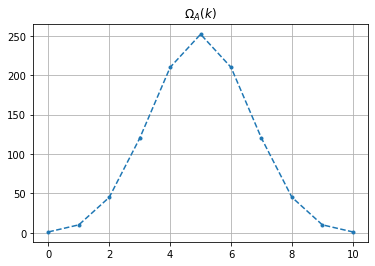

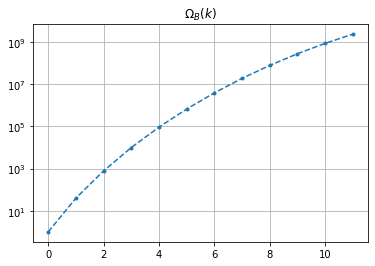

In [161]:
plt.figure()
plt.plot(np.arange(len(OmegaA)), OmegaA, '.--')
plt.grid()
plt.title('$\Omega_A (k)$')


plt.figure()
plt.plot(np.arange(len(OmegaB)), OmegaB, '.--')
plt.yscale('log')
plt.grid()
plt.title('$\Omega_B (k)$')
plt.show()

Some microstates we have considered are unphysical: we cannot have less than $N_{tot} - \max N_A$ particles in system B!

In [162]:
# n. of microstates of A+B system with k particles in subsystem A
OmegaAB = []
for k in range(len(OmegaA)):
    OmegaAB.append(OmegaA[k]*OmegaB[Ntot - k])

# total n. of possible microstates of A+B system
OmegaAB_tot = np.sum(OmegaAB)

# unphysical:
# for k in range(len(OmegaA), len(OmegaB)):
#     OmegaAB += OmegaB[k]

pA = np.array(OmegaAB)/OmegaAB_tot

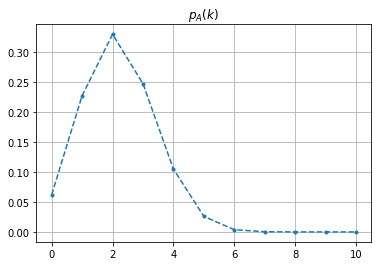

In [163]:
plt.plot(np.arange(len(OmegaA)), pA, '.--')
plt.grid()
plt.title('$p_A (k)$')
plt.show()

average n. of particles in subsystem A

In [164]:
av_nA = np.sum(range(len(pA))*pA)

print(av_nA)

2.2


Now, let's introduce the grand-canonical approximation

compute $\beta\mu$ (it can be both positive and negative, but in the thermodynamic limit - used to derive the grand-canonical ensemble - it must be negative, otherwise the grand-canonical probability distribution will diverge with the n. of particles)

In [165]:
beta_mu = -np.log(comb(sB, Ntot)/comb(sB, Ntot-1))

beta_mu

-1.0033021088637848

how much is valid this approximation?

$S_B(N - k) = S_B(N) +\beta\mu k + O(k^2)$

for each k n. of particles in subsystem A, so let's take its max. value, which in this case is the n. of sites $s_A$ (if instead the total n. of particles that sub-system A can host is bigger than the total n. of particles $N_{tot}$, take $N_{tot}$)

In [166]:
# if the total n.sub-system A can host 
if sA < Ntot:
    n_max = sA
else:
    n_max = Ntot

val1 = np.log(comb(sB, Ntot - n_max))
val2 = np.log(comb(sB, Ntot)) + beta_mu*n_max

print(val1, val2)

3.6888794541139363 11.528271813077652


if you compare directly the n. of microstates:

In [167]:
val1 = comb(sB, Ntot - n_max)
val2 = comb(sB, Ntot)*np.exp(beta_mu*n_max)

print(val1, val2)

40.0 101546.47079964638


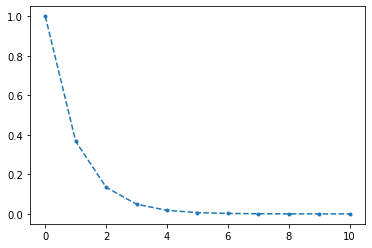

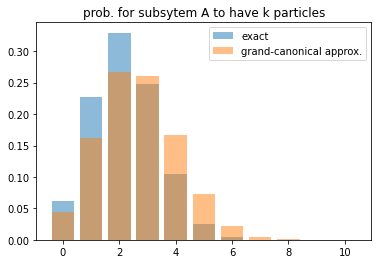

In [168]:
# probability for subsystem A to be in a single microstate with k particles
pA_GC_single = np.exp(beta_mu*np.arange(len(OmegaA)))

plt.plot(pA_GC_single, '.--')

# probability for subsystem A to have k particles
pA_GC = OmegaA*pA_GC_single
pA_GC /= np.sum(pA_GC)

plt.figure()
# plt.plot(pA, '.--', label='exact')
# plt.plot(pA_GC, '.--', label='grand-canonical approx.')

plt.bar(np.arange(len(pA)), pA, alpha=0.5, label='exact')
plt.bar(np.arange(len(pA_GC)), pA_GC, alpha=0.5, label='grand-canonical approx.')

plt.legend()
plt.title('prob. for subsytem A to have k particles')
plt.show()

In [169]:
av_nA_GC = np.sum([k*pA_GC[k] for k in range(len(pA_GC))])
var_nA = np.sum([k**2*pA[k] for k in range(len(pA))]) - av_nA**2
var_nA_GC = np.sum([k**2*pA_GC[k] for k in range(len(pA_GC))]) - av_nA_GC**2

In [157]:
print(Ntot)
print(beta_mu)
print(av_nA, av_nA_GC)
print(var_nA, var_nA_GC)

10
-1.1314021114911006
2.0 2.4390243902439024
1.3061224489795924 1.844140392623438


In [158]:
Ntot_old = Ntot
beta_mu_old = beta_mu
av_nA_old = av_nA
av_nA_GC_old = av_nA_GC
var_nA_old = var_nA
var_nA_GC_old = var_nA_GC

now, change the total n. of particles by a small amount

In [170]:
print(Ntot)
print(beta_mu)
print(av_nA, av_nA_GC)
print(var_nA, var_nA_GC)

11
-1.0033021088637848
2.2 2.682926829268293
1.4008163265306104 1.9631171921475286


In [172]:
# computed from log of partition functions of B (GC def. of mu)
dbeta_mu_def = beta_mu - beta_mu_old

print(dbeta_mu_def)

# computed from 1/var
dbeta_mu = 1/var_nA*(av_nA - av_nA_old)
# dbeta_mu = 1/var_nA_GC*(av_nA_GC - av_nA_GC_old)

# dbeta_mu = 1/var_nA_old*(av_nA - av_nA_old)
# dbeta_mu = 1/var_nA_GC_old*(av_nA_GC - av_nA_GC_old)

print(dbeta_mu)

0.1281000026273158
0.1427738927738931


So, we have two methods to estimate the chemical potential (given that we cannot observe the whole system GC + reservoir): one is to simply vary the chemical potential until you match the desired av. n. of particles in the specified region; the other is to employ the derivative, which is the inverse of the variance of the n. of particles.

What happens with 2 types of particles? You could repeat the first strategy, in order to get the values for the two chemical potentials that exactly match the required av. n.s of particles (is it biunivoc?). You would have to extend the fit of the partition functions, since now you have two particle types in two spatial regions. The other is to employ the derivatives; but now, which are they? Kirkwood-Buff or the inverse of the covariance matrix?

What happens if we have a third type of particles (e.g., salt1, salt2 and water) and we are interested just in one chemical species? Can we go back to the case with 2 particle types, the one we are interested in and all the others? (Salts can dissociate but the chemical potential is just one for both the two ions)